# RO47002 Machine Learning for Robotics
* (c) TU Delft, 2024
* Period: 2024-2025, Q1
* Course homepage: https://brightspace.tudelft.nl/d2l/home/682421

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Moreover, if you see an empty cell, please DO NOT delete it, instead run that cell as you would run all other cells. Please fill in your name(s) and other required details below:

In [1]:
GROUP_NUMBER = "23"
STUDENT_NAME1 = "Daniel Rugge"
STUDENT_NUMBER1 = "4713729"
STUDENT_NAME2 = "Daan Bouwmeester"
STUDENT_NUMBER2 = "5146143"

In [2]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert(GROUP_NUMBER != "")
assert(STUDENT_NAME1 != "")
assert(STUDENT_NUMBER1 != "")
assert(STUDENT_NAME2 != "")
assert(STUDENT_NUMBER2 != "")

### General announcements

* Do *not* share your solutions, and do *not* copy solutions from others. By submitting your solutions, you claim that you and your lab partner alone are responsible for this code.

* Do *not* email questions directly, since we want to provide everybody with the same information and avoid repeating the same answers. Instead, please post your questions regarding this assignment in the correct support forum on Brightspace, this way everybody can benefit from the response. If you do have a particular question that you want to ask directly, please use the scheduled practicum hours to ask a TA.

* There is a strict deadline for each assignment. Students are responsible to ensure that they have uploaded their work in time. So, please double check that your upload succeeded to the Brightspace and avoid any late penalties.

* This [Jupyter notebook](https://jupyter.org/) uses `nbgrader` to help us with automated tests. `nbgrader` will make various cells in this notebook "uneditable" or "unremovable" and gives them a special id in the cell metadata. This way, when we run our checks, the system will check the existence of the cell ids and verify the number of points and which checks must be run. While there are ways that you can edit the metadata and work around the restrictions to delete or modify these special cells, you should not do that since then our nbgrader backend will not be able to parse your notebook and give you points for the assignment. You are free to add additional cells, but if you find a cell that you cannot modify or remove, please know that this is on purpose.

* This notebook will have in various places a line that throws a `NotImplementedError` exception. These are locations where the assignment requires you to adapt the code! These lines are just there as a reminder for youthat you have not yet adapted that particular piece of code, especially when you execute all the cells. Once your solution code replaced these lines, it should accordingly *not* throw any exceptions anymore.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---

# RO4702 - Practicum week 2 - Annotator

* Topic: Data collection
* Year: 2024-2025
* Book chapters: 2, 3

### Installation

Install the required dependency:

```bash
pip install ipympl
```

### Usage
- Left Click: Label the tip.
- Right Click: Label the end.
- Use the slider to switch images after labeling.
- Save annotations periodically with the "Save" button (display(save_button)).

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import glob, os
import pickle
import skimage
import skimage.transform

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, IntSlider
from IPython.display import display

import matplotlib.patches as patches

Replace the path below with the path to your image folder

In [5]:
IMAGE_DIR = 'images\\mypen'

## Get the Data

Read an image, and visualize it

## Load all images

In [6]:
filenames = glob.glob(os.path.join(IMAGE_DIR, '*.jpg'))
filenames = sorted(filenames)
N = len(filenames)
print(f'found {N} images in target directory')

found 37 images in target directory


In [7]:
MAX_SIZE = 1024

def load_and_resize_image(filename, overwrite=False):
    print(f'loading "{filename}" ...')
    I = plt.imread(filename)
    
    # is the width or height too large?
    oversize_ratio = max(I.shape[0] / MAX_SIZE, I.shape[1] / MAX_SIZE)
    if oversize_ratio > 1.0:
        print('resizing image ...')
        I = skimage.transform.rescale(I, (1./oversize_ratio, 1/oversize_ratio, 1), anti_aliasing=True)
        
        # overwrite the old image file after resizing
        if overwrite:
            print(f'overwriting "{filename}" ...')
            plt.imsave(filename, I)
            
    return I

In [8]:
overwrite = True

Is = [load_and_resize_image(filename, overwrite) for filename in filenames]
print('loaded %d images' % len(Is))

loading "images\mypen\IMG_20200901_213826359.jpg" ...
loading "images\mypen\IMG_20200901_213831751.jpg" ...
loading "images\mypen\IMG_20200901_213837780.jpg" ...
loading "images\mypen\IMG_20200901_213842403.jpg" ...
loading "images\mypen\IMG_20200901_213846397.jpg" ...
loading "images\mypen\IMG_20200901_213850041.jpg" ...
loading "images\mypen\IMG_20200901_213854454.jpg" ...
loading "images\mypen\IMG_20200901_213859994.jpg" ...
loading "images\mypen\IMG_20200901_213905809.jpg" ...
loading "images\mypen\IMG_20200901_213912395.jpg" ...
loading "images\mypen\IMG_20200901_213916250.jpg" ...
loading "images\mypen\IMG_20200901_213925990.jpg" ...
loading "images\mypen\IMG_20200901_213929354.jpg" ...
loading "images\mypen\IMG_20200901_213932998.jpg" ...
loading "images\mypen\IMG_20200901_213939451.jpg" ...
loading "images\mypen\IMG_20200901_213943720.jpg" ...
loading "images\mypen\IMG_20200901_213949607.jpg" ...
loading "images\mypen\IMG_20200901_213954091.jpg" ...
loading "images\mypen\IMG_20

In [9]:
import pickle

annot_filename = os.path.join(IMAGE_DIR, 'annots.npy')
annot_exists = os.path.isfile(annot_filename)

print(f'Looking for annotations file "{annot_filename}":', 'found' if annot_exists else 'NOT found')

# load annotations
if annot_exists:
    print('Loading annotations')
    annots = pickle.load(open(annot_filename, 'rb'))
else:
    print('Initializing empty annotations array')
    annots = np.zeros((N,4)) # x1, y1, x2, y2

Looking for annotations file "images\mypen\annots.npy": found
Loading annotations


### Annotate

We will use here `%matplotlib widget` to enable interactive widgets in this notebook. Interactive widgets can take up a lot of memory howeever, so in other notebooks we might prefer to use `%matplotlib inline` to just save plotted results as images without interaction.

In [12]:
%matplotlib widget

interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=36), Output()), _dom_…

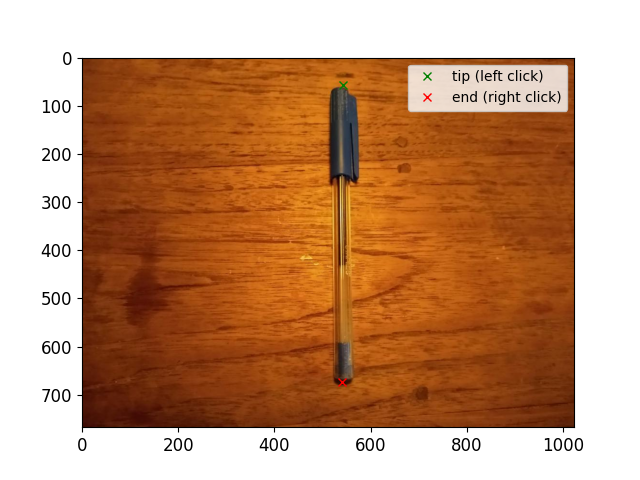

Saving annotations "images\mypen\annots.npy"
Updated annotations for index 30: [655.00129363 644.56822502 472.49838296 120.70616883]
Updated annotations for index 30: [605.13116376 432.62017307 472.49838296 120.70616883]
Updated annotations for index 30: [650.84544947 642.49030294 472.49838296 120.70616883]


In [13]:
# Initialize a figure and axis globally for continuous updates
fig, ax = plt.subplots()

# Initialize plot elements for updating
plt_points_tip = None
plt_points_end = None

# Variable to keep track of event connection
click_cid = None

def annotate_image(idx):
    global plt_points_tip, plt_points_end, click_cid

    # Clear the axis to prepare for a new image
    ax.clear()

    # Load the current image
    I = Is[idx]

    # Display the image
    ax.imshow(I)
    
    # Plot the current annotation points
    plt_points_tip, = ax.plot(annots[idx, 0], annots[idx, 1], 'gx', label='tip (left click)')
    plt_points_end, = ax.plot(annots[idx, 2], annots[idx, 3], 'rx', label='end (right click)')
    ax.legend()

    def onclick(event):
        # Check if the click occurred within the image axis
        if event.inaxes != ax:
            return  # Ignore clicks outside the image area
        
        cx, cy = event.xdata, event.ydata  # Get the click coordinates
        button = event.button  # 1 for left click, 3 for right click

        # Update annotation points based on the click
        if button == 1:
            plt_points_tip.set_xdata([cx])
            plt_points_tip.set_ydata([cy])
            annots[idx, 0] = cx  # Update only the relevant index
            annots[idx, 1] = cy
        elif button == 3:
            plt_points_end.set_xdata([cx])
            plt_points_end.set_ydata([cy])
            annots[idx, 2] = cx  # Update only the relevant index
            annots[idx, 3] = cy
        
        fig.canvas.draw_idle()  # Redraw the figure to reflect updates

        # Print the updated annotations for debugging
        print(f'Updated annotations for index {idx}: {annots[idx]}')

    # Disconnect previous event handlers to prevent duplicates
    if click_cid is not None:
        fig.canvas.mpl_disconnect(click_cid)

    # Connect the click event handler and keep track of the connection ID
    click_cid = fig.canvas.mpl_connect('button_press_event', onclick)

def on_save_button_clicked(b):
    print(f'Saving annotations "{annot_filename}"')
    pickle.dump(annots, open(annot_filename, 'wb'))

save_button = widgets.Button(description="Save changes!")
save_button.on_click(on_save_button_clicked)

interactive(annotate_image, idx=IntSlider(min=0, max=len(Is)-1, continuous_update=False))

### Save your annotations
Run the cell below should give us a buttom "save changes". Click that buttom and save the annotations into 'annots.npy'

In [14]:
display(save_button)

Button(description='Save changes!', style=ButtonStyle())